In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np#provides a multidimensional array object, 
                    #as well as variations such as masks and matrices, which can be used for various math operations
import seaborn as sb #This library is used to visualize our data
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area
import matplotlib.pyplot as plyt
plt.style.use('seaborn-bright')
%matplotlib inline 

In [2]:
movies = pd.read_csv("/Users/vishu/Desktop/project/movies.csv")

In [3]:
ratings = pd.read_csv("/Users/vishu/Desktop/project/ratings.csv")

In [4]:
## lets check the shape

print(movies.shape)

(4803, 24)


In [5]:
print(ratings.shape)

(1048575, 4)


In [6]:
# lets check the column wise info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieid    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [4]:
#Here we are checking the rows having a high percentage of missing values in the dataset.
round(100*(movies.isnull().sum()/len(movies.index)), 2)

index                    0.00
budget                   0.00
genres                   0.58
homepage                64.36
id                       0.00
keywords                 8.58
original_language        0.00
original_title           0.00
overview                 0.06
popularity               0.00
production_companies     0.00
production_countries     0.00
release_date             0.02
revenue                  0.00
runtime                  0.04
spoken_languages         0.00
status                   0.00
tagline                 17.57
title                    0.00
vote_average             0.00
vote_count               0.00
cast                     0.90
crew                     0.00
director                 0.62
dtype: float64

In [34]:
movies.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [8]:
movies = movies.drop(["homepage","keywords","tagline"],axis = 1) #drop the columns

In [9]:
movies.columns

Index(['index', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'director'],
      dtype='object')

In [37]:
movies.isnull().sum()

index                    0
budget                   0
genres                  28
id                       0
original_language        0
original_title           0
overview                 3
popularity               0
production_companies     0
production_countries     0
release_date             1
revenue                  0
runtime                  2
spoken_languages         0
status                   0
title                    0
vote_average             0
vote_count               0
cast                    43
crew                     0
director                30
dtype: int64

In [5]:
#Let's convert budget from $ to Million $ to make our analysis easier.
movies['budget'] = movies['budget']/1000000

In [6]:
movies[['title','budget']].sort_values(by = 'budget', ascending  = False).head(10)

,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380.0
1,Pirates of the Caribbean: At World's End,300.0
7,Avengers: Age of Ultron,280.0
10,Superman Returns,270.0
4,John Carter,260.0
6,Tangled,260.0
5,Spider-Man 3,258.0
13,The Lone Ranger,255.0
46,X-Men: Days of Future Past,250.0
22,The Hobbit: The Desolation of Smaug,250.0


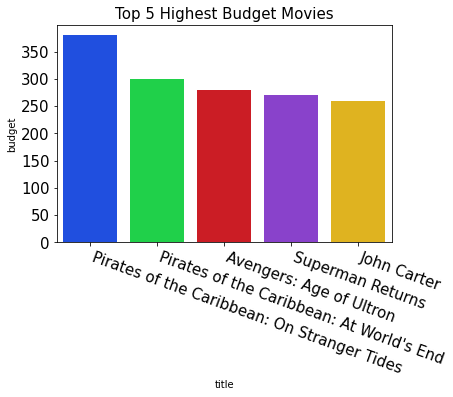

In [7]:
cols = ['title', 'budget']
budget_movies = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_5 = budget_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Budget Movies', fontsize=15);


In [8]:
movies['popularity'] = movies['popularity'].astype('float') #data casting

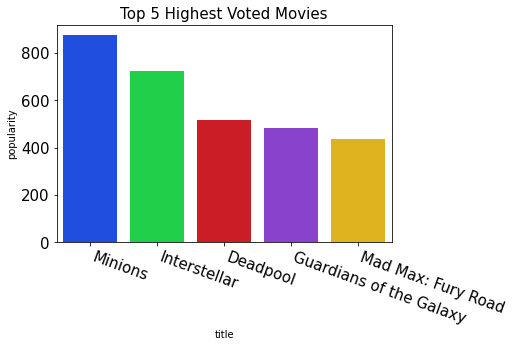

In [9]:
cols = ['title', 'popularity']
popularity_movies = movies.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Voted Movies', fontsize=15);

# Movie ratings analysis

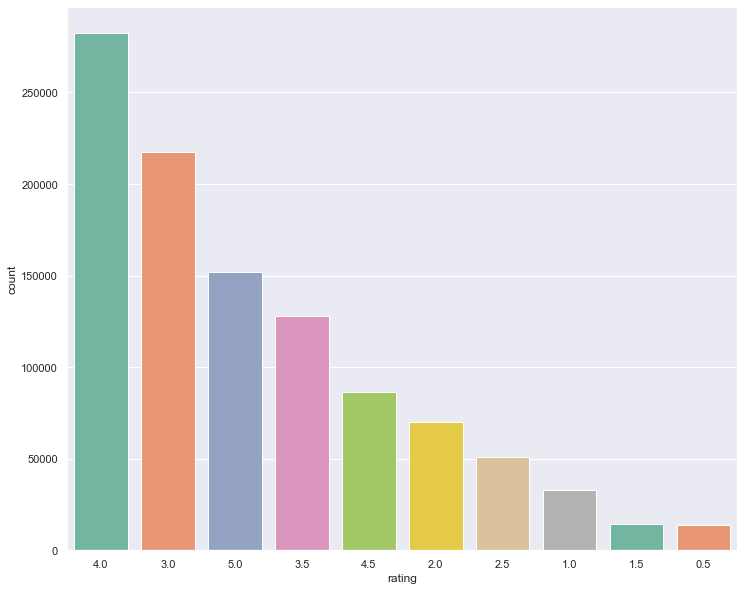

In [10]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=ratings, 
palette="Set2", order=ratings['rating'].value_counts().index[0:15])

In [11]:
df_popular= movies.sort_values('popularity', ascending=False).head(10)

In [12]:
df_popular[['title', 'vote_count', 'vote_average', 'popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564
28,Jurassic World,8662,6.5,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,271.972889
82,Dawn of the Planet of the Apes,4410,7.3,243.791743
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,206.227151
88,Big Hero 6,6135,7.8,203.734590


Text(0.5, 1.0, 'Popular Movies')

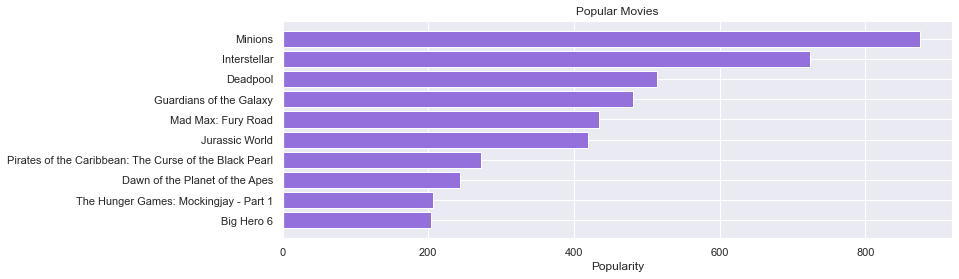

In [13]:
pop= movies.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',color='mediumpurple')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

<function matplotlib.pyplot.show(close=None, block=None)>

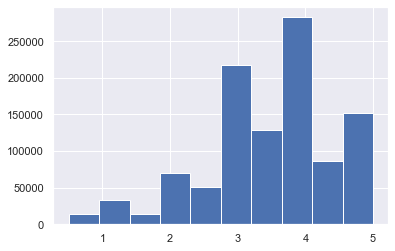

In [16]:
plt.hist(ratings['rating'])
plt.show


In [25]:
no_user_voted = ratings.groupby('movieid')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

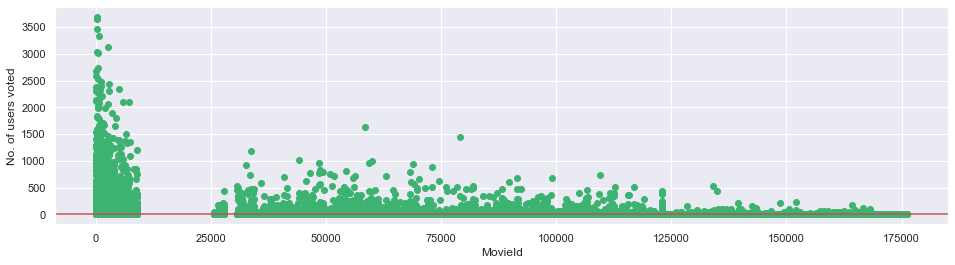

In [26]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

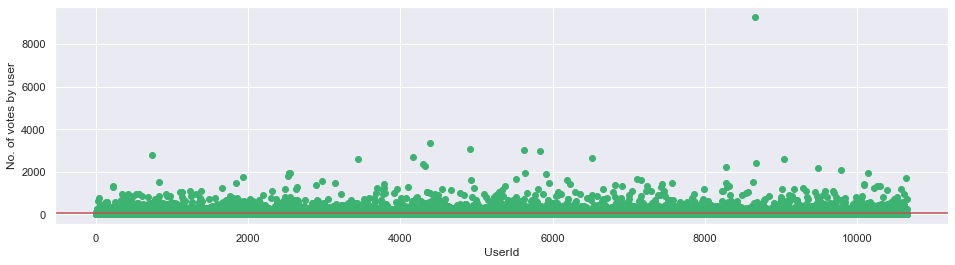

In [28]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

# Working with Director column

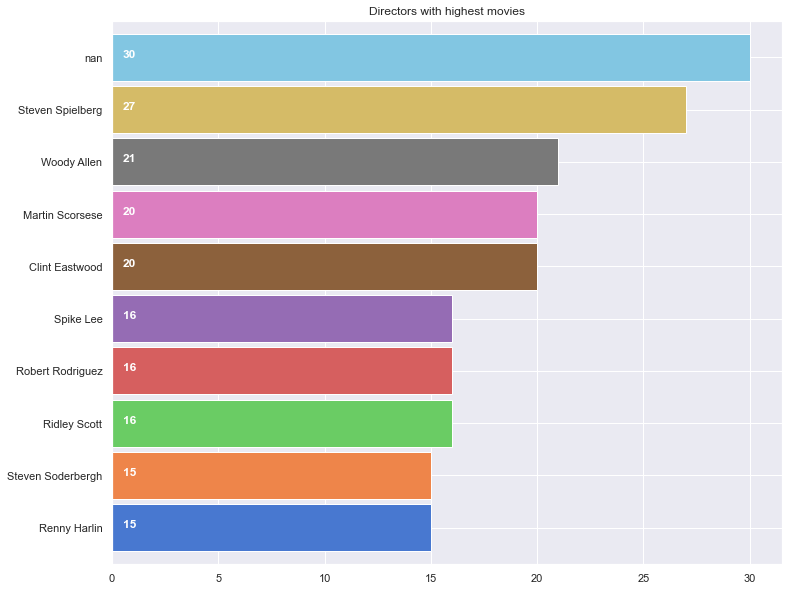

In [42]:
#Enumerate comes with an automatic counter/index to each of the items present in the list. 
#The first index value will start from 0.
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()
